In [ ]:
import pandas as pd
import json

# Load JSON lines from the text file
with open('transactions.txt', 'r') as file:
    json_lines = file.readlines()

# Parse each JSON line and load into a list of dictionaries
data = [json.loads(line) for line in json_lines]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
# Save the DataFrame to a CSV file
df.to_csv('transactions.csv', index=False)


In [ ]:

# Load the data from the CSV file into a DataFrame
#df = pd.read_csv('output_file.csv')
print("Data saved to 'output_file.csv'")

In [15]:
len(df)

786363

In [35]:
# Create a table showing the count of null values in each column
#null_counts = df.apply(lambda x: x.isnull().sum() + (x == '').sum())
index_columns=['accountNumber','customerId']
numeric_columns=['creditLimit','availableMoney','transactionAmount','currentBalance']
categorical_column=['isFraud','expirationDateKeyInMatch','recurringAuthInd','posOnPremises','cardPresent','merchantZip','merchantState','echoBuffer','merchantCity','cardLast4Digits','enteredCVV','merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode']
datetime_columns=['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange']
#df[numeric_columns].describe()

# Create a summary for categorical columns
categorical_summary = df[categorical_column].apply(
    lambda col: pd.Series({
        'Unique Values': col.nunique(),
        'Most Common Value': col.mode()[0] if not col.mode().empty else None,
        'Frequency of Most Common': col.value_counts().max() if not col.value_counts().empty else 0,
        'Missing Values': col.isnull().sum() + (col == '').sum()
    })
)
categorical_summary
#df[datetime_columns].describe()
# Convert the null counts to a DataFrame for better readability
#null_table = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})

# Display the table
#print(null_table)


,isFraud,expirationDateKeyInMatch,recurringAuthInd,posOnPremises,cardPresent,merchantZip,merchantState,echoBuffer,merchantCity,cardLast4Digits,enteredCVV,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode
Unique Values,2,2,1,1,2,1,1,1,1,5246,976,2490,5,5,6,4,19
Most Common Value,False,False,,,False,,,,,593,869,Uber,US,US,05,01,online_retail
Frequency of Most Common,773946,785320,786363,786363,433495,786363,786363,786363,786363,32946,33424,25613,774709,778511,315035,628787,202156
Missing Values,0,0,786363,786363,0,786363,786363,786363,786363,0,0,0,4562,724,4054,409,0


In [39]:

# Create a summary for categorical columns
numeric_summary = df[numeric_columns].apply(
    lambda col: pd.Series({
        'Count':col.count(),
        'Max Value': col.max(),
        'Min Value': col.min(),
        'Mean Value': col.mean(),
        'STD Value': col.std(),
                        'Missing Values': col.isnull().sum() + (col == '').sum()
    })
)
numeric_summary

,creditLimit,availableMoney,transactionAmount,currentBalance
Count,786363.000000,786363.000000,786363.000000,786363.000000
Max Value,50000.000000,50000.000000,2011.540000,47498.810000
Min Value,250.000000,-1005.630000,0.000000,0.000000
Mean Value,10759.464459,6250.725369,136.985791,4508.739089
STD Value,11636.174890,8880.783989,147.725569,6457.442068
Missing Values,0.000000,0.000000,0.000000,0.000000


In [33]:
# Ensure datetime columns are properly parsed
datetime_col = df[datetime_columns].apply(
    lambda col: pd.to_datetime(col, errors='coerce')
)

# Create a summary for max, min, and most repeated date for each datetime column
# Create a DataFrame with stats for each datetime column
datetime_summary = datetime_col.apply(
    lambda col: pd.Series({
        'Min Date': col.min(),
        'Max Date': col.max(),
        'Most Repeated Date': col.mode()[0] if not col.mode().empty else None,
        'Missing Values': col.isnull().sum()+(col=='').sum()
    })
)

# Reset index to make it readable like a grouped table
datetime_summary.reset_index(inplace=True)
datetime_summary.rename(columns={'index': 'Column'}, inplace=True)

# Display the summary
print(datetime_summary)








               Column  transactionDateTime       currentExpDate  \
0            Min Date  2016-01-01 00:01:02  2019-12-01 00:00:00   
1            Max Date  2016-12-30 23:59:45  2033-08-01 00:00:00   
2  Most Repeated Date  2016-05-28 14:24:41  2029-03-01 00:00:00   
3      Missing Values                    0                    0   

       accountOpenDate dateOfLastAddressChange  
0  1989-08-22 00:00:00     1989-08-22 00:00:00  
1  2015-12-31 00:00:00     2016-12-30 00:00:00  
2  2014-06-21 00:00:00     2016-03-15 00:00:00  
3                    0                       0  


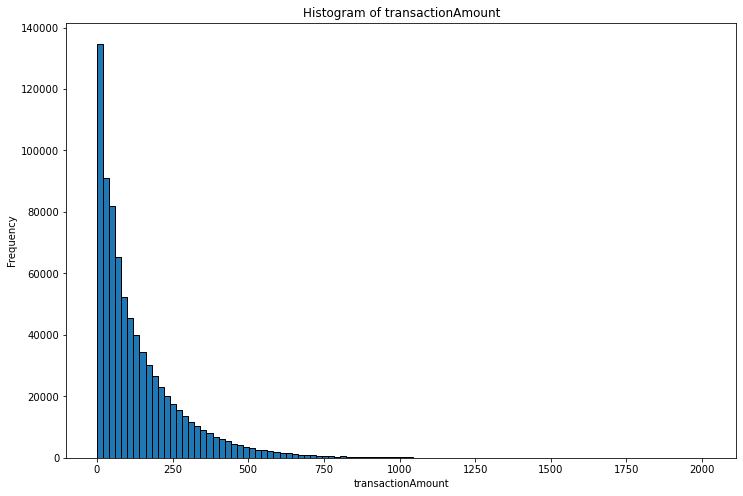

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))  # Adjust the size as needed (width, height)

plt.hist(df['transactionAmount'], bins=100, edgecolor='black')  # Adjust bins as necessary for discreteness
plt.xlabel('transactionAmount')
plt.ylabel('Frequency')
plt.title(f'Histogram of transactionAmount')
plt.show()

skew towards the left. A lot of low transactions. Most of the transactions are from online retail and food which is a less expensive category

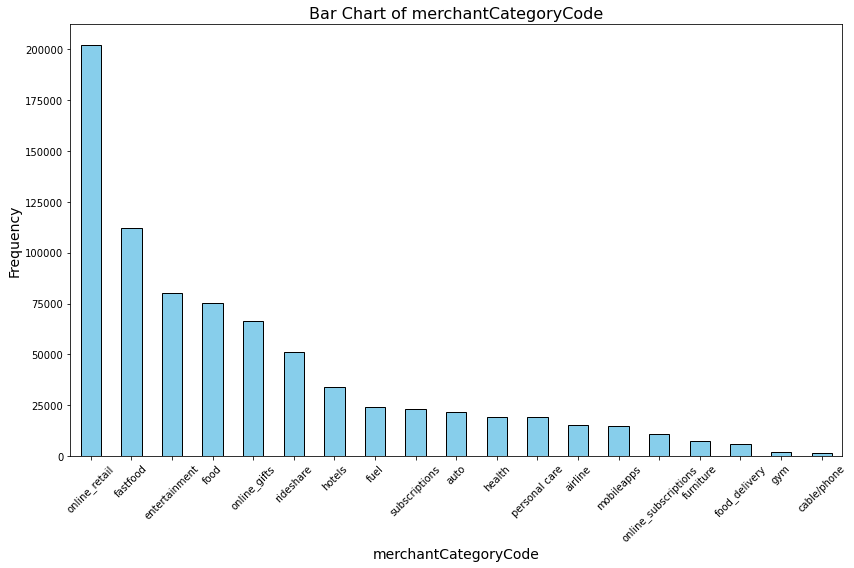

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))  # Adjust the size as needed (width, height)
column_name='merchantCategoryCode'
value_counts = df[column_name].value_counts()

value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel(column_name, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'Bar Chart of {column_name}', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [63]:

result = (
    df.groupby('merchantCategoryCode')
    .agg({
        'transactionAmount': ['max', 'min', 'mean','count']
    })
    .rename(columns={
        'max': 'Max transaction', 
        'min': 'Min transaction', 
        'mean': 'Mean transaction',
        'count': 'Count transaction'
    })
)

# Flatten the column names for easier access (optional)
result.columns = result.columns.get_level_values(1)

# Sort by 'Mean transaction'
result = result.sort_values('Mean transaction', ascending=False)

# Display the result
result

#[df['merchantCategoryCode'].isin(['online_retail','fastfood'])]

,Max transaction,Min transaction,Mean transaction,Count transaction
merchantCategoryCode,,,,
personal care,1506.57,0.0,147.516877,18964
subscriptions,1440.01,0.0,146.900673,22901
rideshare,1398.23,0.0,146.220783,51136
online_gifts,1566.37,0.0,146.126042,66238
entertainment,1562.32,0.0,146.041694,80098
health,1767.50,0.0,145.706099,19092
fastfood,1905.30,0.0,145.591507,112138
hotels,1546.48,0.0,145.585076,34097
food,1873.97,0.0,145.313906,75490


FINDING REVERSALS AND MULTISWIPES

In [ ]:
#####FINDING MULTIPLE SWIPES

df['date'] = pd.to_datetime(df['transactionDateTime']).dt.date
df['duplication'] = df[['customerId','date','transactionAmount','merchantName']].duplicated()
data_dup.loc[data_dup['transactionType'] == 'REVERSAL', 'duplication'] = False


total_multiswipes=data_dup["duplication"].value_counts()[1]
Dollar_value_multiwsipe=data_dup.groupby('duplication').agg({'transactionAmount': ['sum']})


####Finding Reversals
reversal_data=data.loc[data['transactionType']=='REVERSAL']
dollar_reversal=reversal_data.transactionAmount.sum()
total_reversal=len(reversal_data)
#print(dollar_reversal,total_reversal)